<a href="https://colab.research.google.com/github/anabiax/PyAnaliseDados/blob/main/analiseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE MICRODADOS DO ENEM

### Explorar os dados com um objetivo claro. Saber que tipo de visualização estarei gerando é importante para responder determinados tipos de perguntas. Assim, será possível extrair as melhores funcionalidades dos pacotes.


In [2]:
!pip install pandas matplotlib numpy scipy ColabTurtlePlus

In [3]:
import pandas as pd   # leitura e manipulacao de dados
import matplotlib.pyplot as plt   # cricao de graficos
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!head /content/drive/MyDrive/MICRODADOS_ENEM_2022.csv

NU_INSCRICAO;NU_ANO;TP_FAIXA_ETARIA;TP_SEXO;TP_ESTADO_CIVIL;TP_COR_RACA;TP_NACIONALIDADE;TP_ST_CONCLUSAO;TP_ANO_CONCLUIU;TP_ESCOLA;TP_ENSINO;IN_TREINEIRO;CO_MUNICIPIO_ESC;NO_MUNICIPIO_ESC;CO_UF_ESC;SG_UF_ESC;TP_DEPENDENCIA_ADM_ESC;TP_LOCALIZACAO_ESC;TP_SIT_FUNC_ESC;CO_MUNICIPIO_PROVA;NO_MUNICIPIO_PROVA;CO_UF_PROVA;SG_UF_PROVA;TP_PRESENCA_CN;TP_PRESENCA_CH;TP_PRESENCA_LC;TP_PRESENCA_MT;CO_PROVA_CN;CO_PROVA_CH;CO_PROVA_LC;CO_PROVA_MT;NU_NOTA_CN;NU_NOTA_CH;NU_NOTA_LC;NU_NOTA_MT;TX_RESPOSTAS_CN;TX_RESPOSTAS_CH;TX_RESPOSTAS_LC;TX_RESPOSTAS_MT;TP_LINGUA;TX_GABARITO_CN;TX_GABARITO_CH;TX_GABARITO_LC;TX_GABARITO_MT;TP_STATUS_REDACAO;NU_NOTA_COMP1;NU_NOTA_COMP2;NU_NOTA_COMP3;NU_NOTA_COMP4;NU_NOTA_COMP5;NU_NOTA_REDACAO;Q001;Q002;Q003;Q004;Q005;Q006;Q007;Q008;Q009;Q010;Q011;Q012;Q013;Q014;Q015;Q016;Q017;Q018;Q019;Q020;Q021;Q022;Q023;Q024;Q025
210057943671;2022;14;M;2;2;1;1;2;1;;0;;;;;;;;5300108;Bras�lia;53;DF;0;0;0;0;;;;;;;;;;;;;0;;;;;;;;;;;;A;A;A;B;3;B;B;B;B;B;B;B;A;B;B;B;A;A;A;A;A;A;A;A;A
210057

In [7]:
microDadosENEM = pd.read_csv("/content/drive/MyDrive/MICRODADOS_ENEM_2022.csv",
                              sep=';', encoding = "ISO-8859-1")
microDadosENEM.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [8]:
microDadosENEM  # essa forma mostra todas as linhas no total

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,2022,3,M,1,1,1,2,0,2,...,B,A,B,B,B,A,E,A,A,B
3476101,210057205644,2022,14,F,2,1,1,2,0,2,...,A,A,A,B,A,A,C,A,B,B
3476102,210056699189,2022,2,M,1,1,1,2,0,2,...,B,A,B,C,B,A,E,A,B,B
3476103,210056983033,2022,3,M,1,3,1,2,0,3,...,B,A,B,D,A,A,E,A,B,B


In [ ]:
# identificando os nomes das colunas:
microDadosENEM.columns

In [ ]:
microDadosENEM.columns.values

In [ ]:
#Verificando os tipos de dados de cada coluna
microDadosENEM.info()

**ANÁLISE EXPLORATÓRIA DE DADOS**

**Dado** - trata-se do registro de um fato/evento isolado ocorrido. <br>
**Informação** - é a camada de sentido atribuída a um dado.

In [9]:
colunasSelecionadasENEM = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
                           'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC',
       'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC',
       'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA',
       'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [10]:
microDadosENEMSelecionado = microDadosENEM.filter(items=colunasSelecionadasENEM)
                                             # nome do parâmetro é sempre items

# trabalhar com um df significa que o processamento a partir de então será + rápido

In [11]:
microDadosENEMSelecionado.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_MUNICIPIO_ESC,...,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002
0,210057943671,14,M,2,2,1,2,1,0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A
1,210057516120,14,M,2,1,1,16,1,0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D
2,210057280536,5,F,1,2,1,2,1,0,NaN,...,1,1.0,140.0,200.0,120.0,140.0,160.0,760.0,E,F
3,210055724397,6,M,1,3,1,2,1,0,NaN,...,1,1.0,120.0,40.0,40.0,100.0,20.0,320.0,C,A
4,210055097896,4,M,0,3,1,1,1,0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B


In [ ]:
microDados100 = microDadosENEMSelecionado[0:100]  # limita a quantidade de linhas

In [12]:
colunaNomeMunicipioProva = microDadosENEMSelecionado['NO_MUNICIPIO_PROVA']
colunaNomeMunicipioProva

# um novo objeto é atribuído a este resultado qnd extraio uma coluna \
                            # - faz parte do processamento do pd
# SÉRIE é o nome disso - é como se fosse uma lista com índices no pd

0                           Brasília
1                           Brasília
2          Presidente Tancredo Neves
3                          Cariacica
4                        Salinópolis
                     ...            
3476100                   Jaguariúna
3476101                      Caruaru
3476102                        Lages
3476103                       Guaíra
3476104                      Goiânia
Name: NO_MUNICIPIO_PROVA, Length: 3476105, dtype: object

In [ ]:
# saber a distribuicao de alunos por município -
# retorna uma série contendo as qtd de valores únicos (qts linhas tem em cada)

colunaNomeMunicipioProva.value_counts() # ordena por quantidade
colunaNomeMunicipioProva.value_counts().sort_index() # ordem alfabética

In [ ]:
colunaFaixaEtaria = microDadosENEMSelecionado['TP_FAIXA_ETARIA']
#colunaFaixaEtaria
colunaFaixaEtaria.value_counts().sort_index()

In [ ]:
colunaFaixaEtaria.hist(bins=30) # histograma

In [ ]:
colunaNomeMunicipioEscola = microDados100['NO_MUNICIPIO_ESC']
colunaNomeMunicipioEscola.value_counts()

In [ ]:
colunaRaca = microDadosENEMSelecionado['TP_COR_RACA']
colunaRaca.value_counts()

3    1488844
1    1428081
2     408422
4      66051
0      64867
5      19840
Name: TP_COR_RACA, dtype: int64

In [14]:
distribuicaoRaca = colunaRaca.value_counts()
percentualPessoasPretas = [100 * numeroResultante / distribuicaoRaca.sum()\
    for numeroResultante in distribuicaoRaca]
# pego o resultado, divido pelo total (soma dos 5) e multiplica por 100 p/
                                                          # obter a porcentagem

percentualPessoasPretas

# Leitura: 42,83% das pessoas que fizeram ENEM são pardas
#          41,08% são brancas
#          11,74% são pretas
#          1,90% são amarelas
#          1,86% não declarado
#          0,57 - são indígenas

NameError: name 'colunaRaca' is not defined

In [ ]:
colunaSexo = microDadosENEMSelecionado['TP_SEXO']

distruibuicaoSexo = colunaSexo.value_counts()
distruibuicaoSexo

percentualSexo = [100 * resultado / distruibuicaoSexo.sum()\
                  for resultado in distruibuicaoSexo]
percentualSexo

# Leitura: 61,00% são mulheres
#          38% são homens

[61.00273150552127, 38.99726849447873]

In [ ]:
# extrair a info de quantas mulheres negras fizeram o vestiba

sexoFeminino = distruibuicaoSexo[0]
pessoasNegras = distribuicaoRaca[2]

In [ ]:
sexoFeminino

2120519

In [ ]:
pessoasNegras

408422

In [ ]:
# dentro do universo que declararam ser mulheres negras,
  # qual é a porcentagem desta categoria?

percentualMulheresNegras = 100 * pessoasNegras / sexoFeminino
percentualMulheresNegras

19.26047349729005

**Obter as notas de redação do ENEM segundo as declarações de sexo dos candidatos que se inscreveram**
- usando groupBy - agrupo segundo a minha coluna de sexo


In [15]:
colunasSelecionadas = ['TP_SEXO', 'NU_NOTA_REDACAO']

In [16]:
microDadosENEMSexoRedacao = microDadosENEM.filter(items=colunasSelecionadas)

microDadosENEMSexoRedacao = microDadosENEMSexoRedacao.dropna() # remove os NaN

In [17]:
microDadosENEMSexoRedacao.head()

,TP_SEXO,NU_NOTA_REDACAO
2,F,760.0
3,M,320.0
7,F,440.0
9,F,360.0
11,F,940.0


In [18]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').count()
# quantidade dos que declararam F e M

,NU_NOTA_REDACAO
TP_SEXO,
F,1530098
M,963344


A nota máxima é a mesma p/ homens e mulheres?

In [19]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,1000.0


In [20]:
microDadosENEMSexoRedacao[microDadosENEMSexoRedacao.NU_NOTA_REDACAO > 0]\
                                                      .groupby('TP_SEXO').min()
# tirando os que fugiram do tema e os demais casos de nota zerada, a menor nota
                        # foi 40. Então o indicador ainda nao foi tão relevante

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


In [ ]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').mean()
# esse indicador já trouxe a info de que a nota feminina é um pouco maior

In [ ]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').median()

In [ ]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').hist()

In [ ]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').describe()
# dá a noção do conjunto de dados - + estatístico

**Filtrar por indicadores socioeconômicos filtrando pela redacao e matematica**

In [21]:
colunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', \
                       'Q001', 'Q002']

In [22]:
microdadosENEMSelecionado = microDadosENEM.filter(items=colunasSelecionadas)
microdadosENEMSelecionado = microdadosENEMSelecionado.dropna()
microdadosENEMSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
2,210057280536,565.3,760.0,E,F
3,210055724397,416.0,320.0,C,A
7,210055778089,404.9,440.0,E,E
9,210055461467,435.3,360.0,E,E
11,210054972570,456.8,940.0,E,E


**Q001**- até que série seu pai, ou o homem responsável por você, estudou? <br>
**Q002**- até que série sua mãe, ou a mulher responsável por você, estudou? <br>

## mapear chaves à valores p/ extrair informações do dado

In [23]:
# definindo um dicionário p/ visualizar melhor o resultado
# chave e valor
# chaves devem ser do tipo imutável - não mudam ao longo do período

q001e002Dicionario = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei.'
}

In [ ]:
microdadosENEMSelecionado.filter(items=['Q001', 'NU_INSCRICAO']).groupby('Q001')\
                                                                      .count()

,NU_INSCRICAO
Q001,
A,75867
B,350284
C,291859
D,259673
E,720913
F,250540
G,193050
H,202637


In [24]:
#microdadosENEMSelecionado.Q001

# criar nova coluna no df p/ relacionar a chave ao valor

# inserindo coluna NO_Q001:
microdadosENEMSelecionado['NO_Q001'] =\
 [q001e002Dicionario[resposta] for resposta in microdadosENEMSelecionado.Q001]
# essa info vai gerar uma lista e a primeira parte antes do for determina
                                                                # como ela será
                                            # forma de pegar infos do dicionario
                           # resposta equivale a cada chave(letra) do dicionario

# inserindo coluna NO_Q002:
microdadosENEMSelecionado['NO_Q002'] =\
 [q001e002Dicionario[resposta] for resposta in microdadosENEMSelecionado.Q002]


microdadosENEMSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
2,210057280536,565.3,760.0,E,F,"Completou o Ensino Médio, mas não completou a ...","Completou a Faculdade, mas não completou a Pós..."
3,210055724397,416.0,320.0,C,A,"Completou a 4ª série/5º ano, mas não completou...",Nunca estudou
7,210055778089,404.9,440.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
9,210055461467,435.3,360.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
11,210054972570,456.8,940.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


Comparando distribuição do nível de escolaridade Pai X Mãe no conjunto de dados


In [25]:
# pai
microdadosENEMSelecionado.filter(items=['NU_INSCRICAO', 'NO_Q001']) \
     .groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

# a quantidade de "nao sei" qnd se trata de pais é bem maior
  # - boa parte dos lares no BR são chefiados pela figura materna

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",720913
Não completou a 4ª série/5º ano do Ensino Fundamental.,350284
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",291859
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",259673
"Completou a Faculdade, mas não completou a Pós-graduação.",250540
Não sei.,202637
Completou a Pós-graduação.,193050
Nunca estudou,75867


In [26]:
# mae
microdadosENEMSelecionado.filter(items=['NU_INSCRICAO', 'NO_Q002'])\
.groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",851162
"Completou a Faculdade, mas não completou a Pós-graduação.",329384
Completou a Pós-graduação.,322603
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",262334
Não completou a 4ª série/5º ano do Ensino Fundamental.,238683
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",232165
Não sei.,62486
Nunca estudou,46006


In [27]:
# desempenho em matematica de acordo com os dados obtidos acima - pai

microdadosENEMSelecionado.filter(items=['NU_NOTA_MT', 'NO_Q001'])\
        .groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)

# quem tira a media maior em matematica é quem é filho de pais que tiveram
                                                        # acesso à pós-graduacao
# a media dos candidatos cresce à medida que cresce a escolaridade dos pais

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação.,622.681863
"Completou a Faculdade, mas não completou a Pós-graduação.",606.265275
"Completou o Ensino Médio, mas não completou a Faculdade.",550.539180
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",528.257192
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",518.945360
Não sei.,509.209243
Não completou a 4ª série/5º ano do Ensino Fundamental.,500.422448
Nunca estudou,477.496748


In [28]:
# desempenho em matematica de acordo com os dados obtidos acima - mãe

microdadosENEMSelecionado.filter(items=['NU_NOTA_MT', 'NO_Q002'])\
        .groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação.,602.375859
"Completou a Faculdade, mas não completou a Pós-graduação.",591.089336
"Completou o Ensino Médio, mas não completou a Faculdade.",540.254915
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",515.969635
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",507.631458
Não sei.,497.162744
Não completou a 4ª série/5º ano do Ensino Fundamental.,492.413723
Nunca estudou,470.632798


Olhando o desempenho em redação segundo a escolaridade Pai X Mãe


In [29]:
# por escolaridade do pai
microdadosENEMSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001'])\
   .groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,736.997565
"Completou a Faculdade, mas não completou a Pós-graduação.",715.404007
"Completou o Ensino Médio, mas não completou a Faculdade.",646.213621
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",612.782846
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",596.927078
Não sei.,568.765230
Não completou a 4ª série/5º ano do Ensino Fundamental.,568.412945
Nunca estudou,523.250952


In [30]:
# por escolaridade da mãe
microdadosENEMSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
   .groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,716.894449
"Completou a Faculdade, mas não completou a Pós-graduação.",697.592051
"Completou o Ensino Médio, mas não completou a Faculdade.",630.876801
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",591.665053
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",576.363104
Não completou a 4ª série/5º ano do Ensino Fundamental.,551.248476
Não sei.,529.589668
Nunca estudou,501.226362


<Axes: xlabel='NO_Q001'>

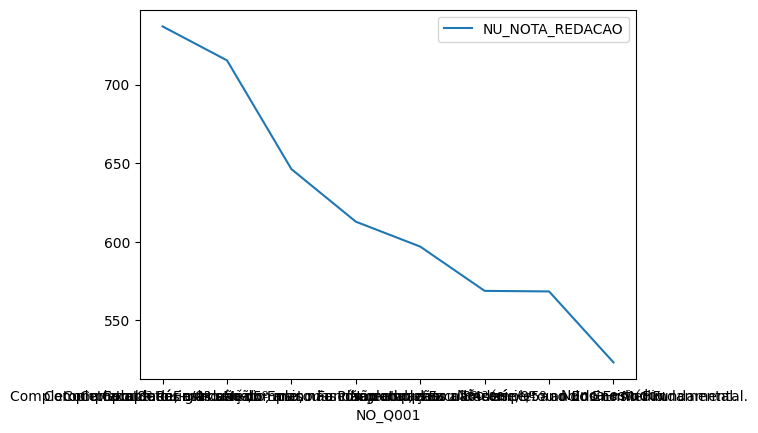

In [31]:
q001Redacao = microdadosENEMSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001'])\
   .groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

q001Redacao.plot()

<Axes: xlabel='NO_Q002'>

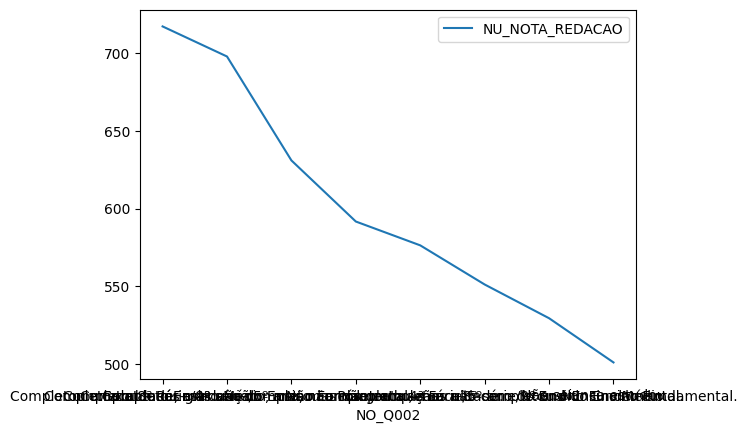

In [32]:
q002Redacao = microdadosENEMSelecionado.filter(items=['NU_NOTA_REDACAO',\
                                                      'NO_Q002'])\
   .groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

q002Redacao.plot()

<Figure size 1000x600 with 0 Axes>

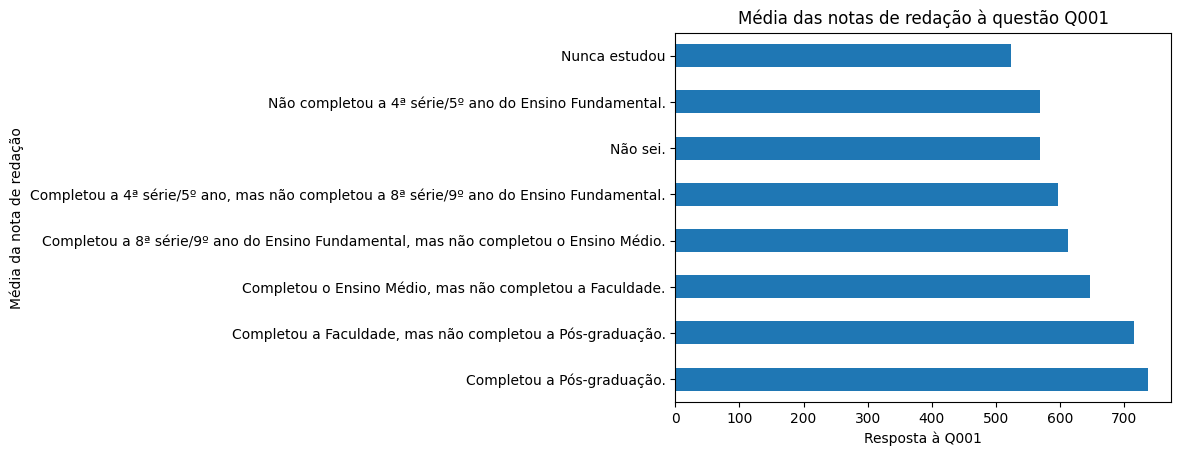

<Figure size 1000x600 with 0 Axes>

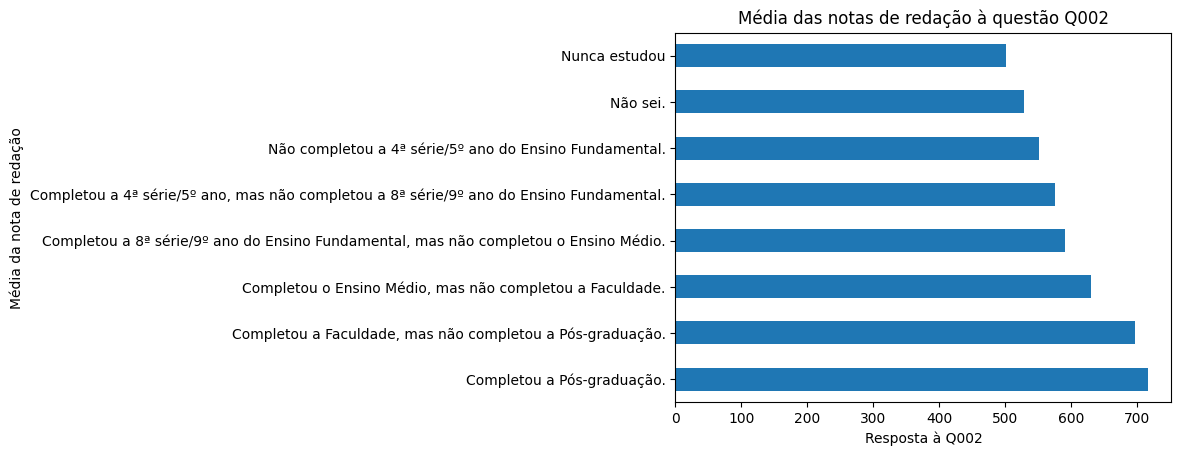

In [ ]:
# Plota para a variável q001Redacao
plt.figure(figsize=(10, 6))
q001Redacao.plot(kind='barh', legend=False)
plt.title('Média das notas de redação à questão Q001')
plt.xlabel('Resposta à Q001')
plt.ylabel('Média da nota de redação')
plt.show()

# Plota para a variável q002Redacao
plt.figure(figsize=(10, 6))
q002Redacao.plot(kind='barh', legend=False)
plt.title('Média das notas de redação à questão Q002')
plt.xlabel('Resposta à Q002')
plt.ylabel('Média da nota de redação')
plt.show()

**Essa tendência se mantém se aplicado o indicador de Estado?**

In [33]:
colunasSelecionadas = ['NU_INSCRICAO', 'SG_UF_ESC', 'NU_NOTA_MT',\
                       'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [34]:
microdadosENEMSelecionado['SG_UF_ESC'] = microDadosENEM.SG_UF_ESC

In [35]:
microdadosENEMSelecionado = microdadosENEMSelecionado.dropna()
microdadosENEMSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002,SG_UF_ESC
40,210056717205,430.4,560.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...,CE
55,210056012033,905.5,900.0,D,F,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou a Faculdade, mas não completou a Pós...",SP
57,210056292241,551.9,740.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...,GO
59,210054772114,433.6,520.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",PA
67,210055580862,438.0,540.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...",RJ


In [36]:
microdadosENEMSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
  .where(microdadosENEMSelecionado.SG_UF_ESC == 'SP')\
  .groupby('NO_Q002').mean()\
  .sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,711.793902
"Completou a Faculdade, mas não completou a Pós-graduação.",696.217478
"Completou o Ensino Médio, mas não completou a Faculdade.",632.472141
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",599.542259
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",590.590622
Não completou a 4ª série/5º ano do Ensino Fundamental.,570.911356
Não sei.,553.774834
Nunca estudou,524.710579


In [37]:
microdadosENEMSelecionado.filter(items=['SG_UF_ESC', 'NU_NOTA_REDACAO', 'NO_Q002'])\
                                      .groupby(['SG_UF_ESC', 'NO_Q002']).mean()

NU_NOTA_REDACAO
SG_UF_ESC NO_Q002                                                            
AC        Completou a 4ª série/5º ano, mas não completou ...       548.363636
          Completou a 8ª série/9º ano do Ensino Fundament...       552.696246
          Completou a Faculdade, mas não completou a Pós-...       663.745020
          Completou a Pós-graduação.                               715.263158
          Completou o Ensino Médio, mas não completou a F...       600.564263
...                                                                       ...
TO        Completou a Pós-graduação.                               684.520397
          Completou o Ensino Médio, mas não completou a F...       587.686567
          Nunca estudou                                            502.500000
          Não completou a 4ª série/5º ano do Ensino Funda...       478.796992
          Não sei.                                                 529.323308

[216 rows x 1 columns]

<Axes: xlabel='Q002'>

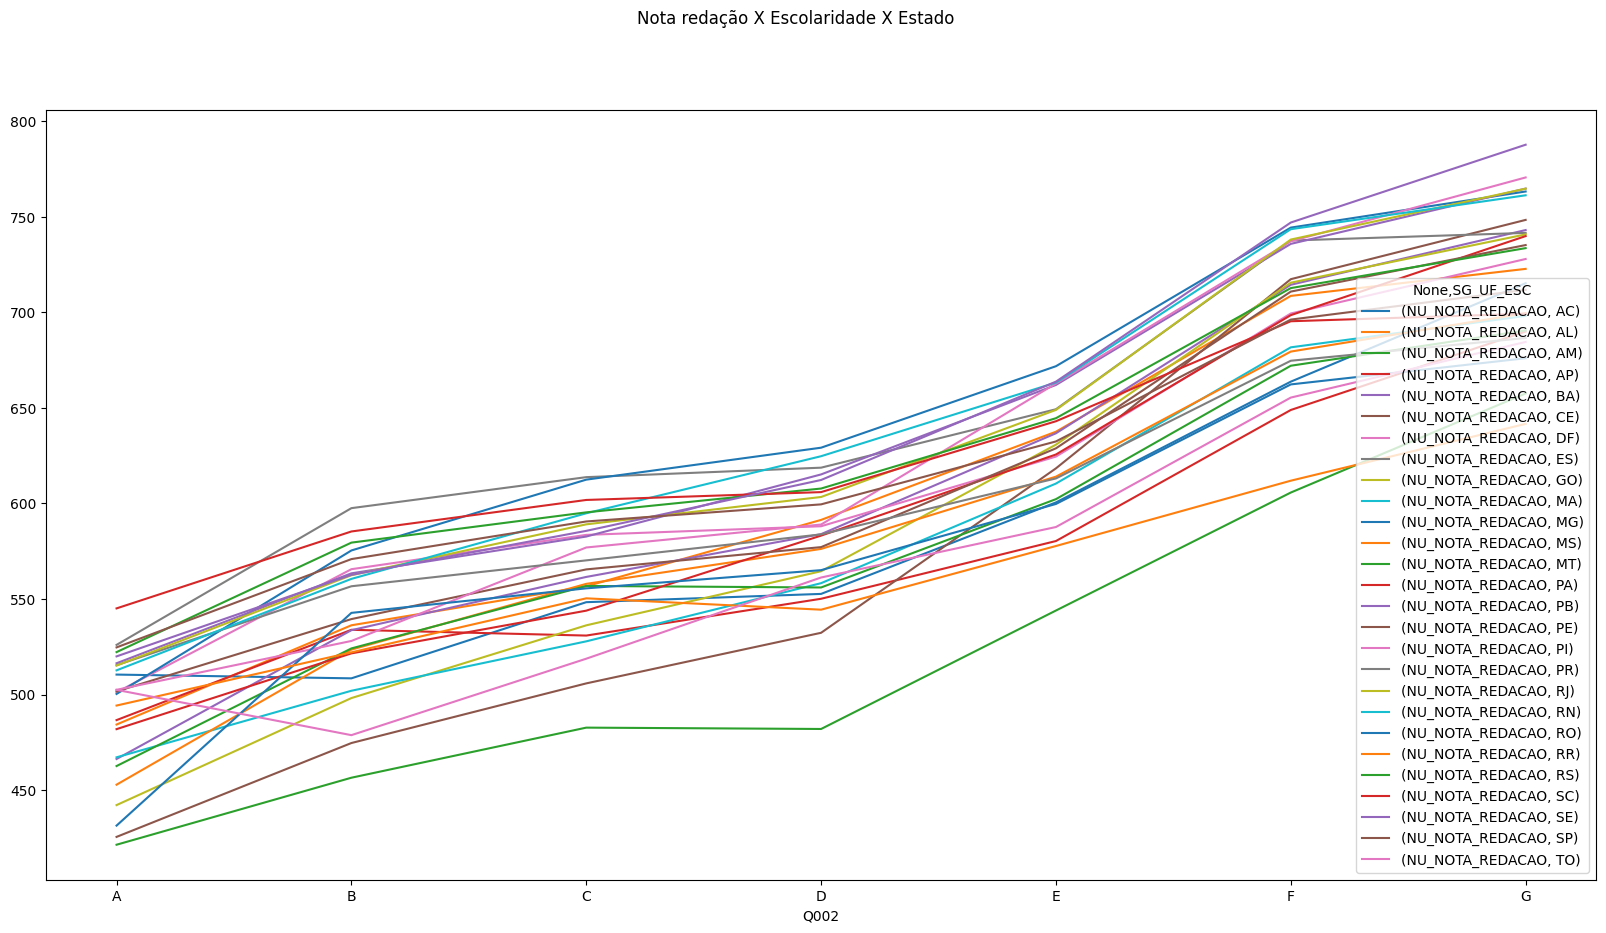

In [38]:
# notas por estado

fig, ax = plt.subplots(figsize = (20, 10))
plt.suptitle('Nota redação X Escolaridade X Estado')

microdadosENEMSelecionado.filter(items=['SG_UF_ESC', 'Q002', 'NU_NOTA_REDACAO'])\
.where(microdadosENEMSelecionado.Q002 != 'H').groupby(['Q002', 'SG_UF_ESC'])\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).unstack().plot(ax=ax)

                             # unstack separa a informacao por grupos do groupBy
                             # separa por estados cada linha

# tendência para o grupo de estados esse tipo de gráfico é útil
# H é o 'Não sei.'

# conforme cresce a escolaridade maior é a nota de redacao

# Introdução ao Matplotlib
## Lib para fazer gráficos

### Conceitos
- Figura - o conjunto maior do gráfico
- Axes - gráfico propriamente
- Axis - infos dentro do gráfico, que são os eixos X e Y juntamente com título e label.


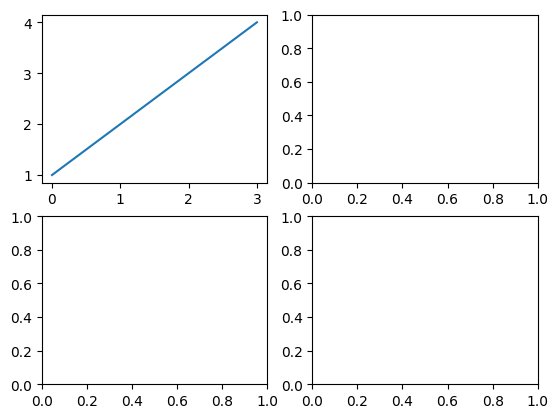

In [ ]:
x = [1, 2, 3, 4]

fig1, f1_axes = plt.subplots(ncols=2, nrows=2)

# 4 axes
# retorna um ponteiro - apontador pra figura1 e um apontador p/ axes

# p/ acessar cada subplot
f1_axes[0, 0].plot(x)  # 1ª caixinha
# 00 01
# 10 11

In [ ]:
f1_axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

Text(0.5, 1.0, 'Caixa 4')

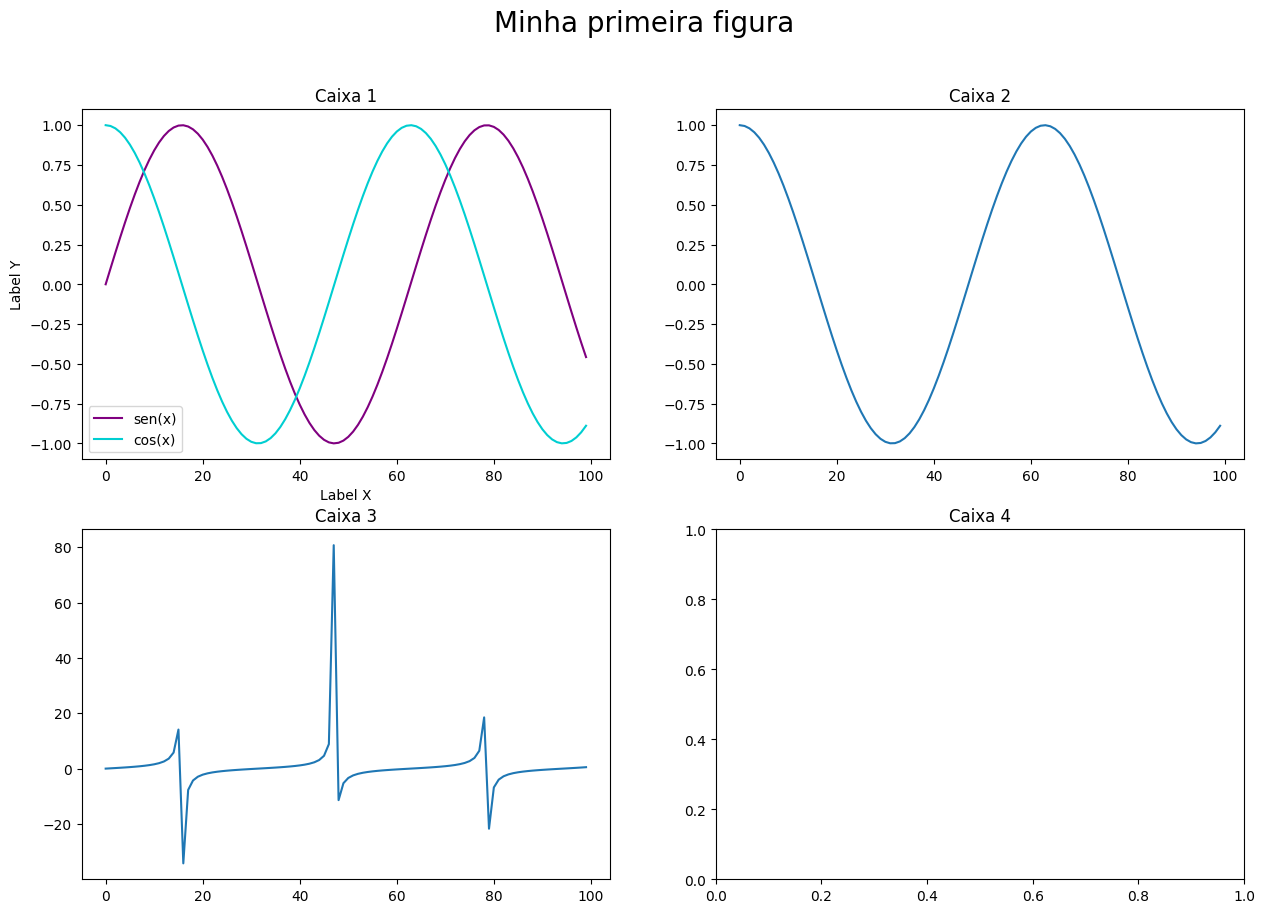

In [ ]:
x = np.arange(0, 10, 0.1)  # 3º parâmetro é o incrementador

fig1, f1_axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
fig1.suptitle("Minha primeira figura", size=20)

f1_axes[0, 0].plot(np.sin(x), label="sen(x)", color="purple")   # funcao seno de X
f1_axes[0, 0].plot(np.cos(x), label="cos(x)", color="darkturquoise")   # funcao cosseno de X
f1_axes[0, 0].set_title("Caixa 1")
f1_axes[0, 0].set_xlabel("Label X")
f1_axes[0, 0].set_ylabel("Label Y")
f1_axes[0, 0].legend()

f1_axes[0, 1].plot(np.cos(x))    # funcao cosseno de X
f1_axes[0, 1].set_title("Caixa 2")


f1_axes[1, 0].plot(np.tan(x))    # funcao tangente de X
f1_axes[1, 0].set_title("Caixa 3")


f1_axes[1, 1].set_title("Caixa 4")


In [ ]:
x

In [ ]:
# para verificar a documentação dentro do jupyter

np?
np.sin?

Text(0.02, 0.7, 'A : Nunca estudou\nB : Não completou a 4ª série/5º ano do Ensino Fundamental.\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.\nE : Completou o Ensino Médio, mas não completou a Faculdade.\nF : Completou a Faculdade, mas não completou a Pós-graduação.\nG : Completou a Pós-graduação.\nH : Não sei.\n')

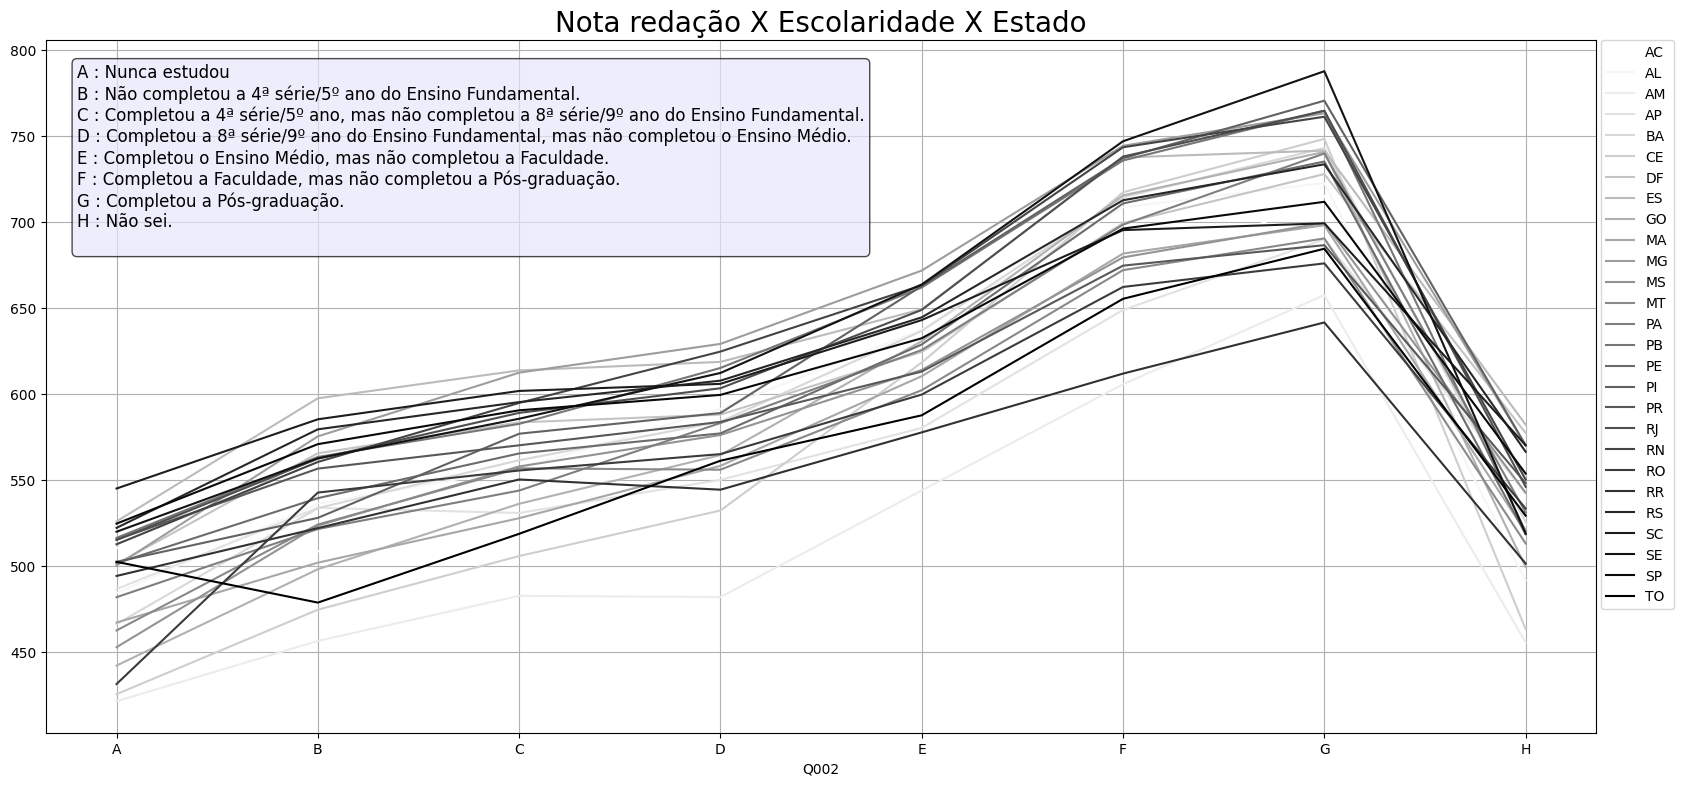

In [39]:

ax = microdadosENEMSelecionado.filter(items=['SG_UF_ESC', 'Q002', 'NU_NOTA_REDACAO'])\
  .groupby(['Q002', 'SG_UF_ESC'])\
  .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).unstack()\
  .plot(figsize = (20, 9), colormap='binary', grid=True)
                                              # esse ultimo sao os quadriculados

# usar os atributos do objeto axes p/ alterar o objeto

ax.set_title('Nota redação X Escolaridade X Estado', fontsize=20)

handles, labels = ax.get_legend_handles_labels()
# handles sao ponteiros que podem ser usados p/ tratar diversas camadas da figura


# pacote de expressoes regulares
import re
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]

# é uma boa usar regex em conjuntos de dados que usam strings

# como se lê:
# "Procure uma vírgula, pq antes da sigla de estado sempre há uma vírgula.
# \s representa espaço
# parenteses indica a info que eu quero que ele pegue
# 'pegue todo o caracter que estiver dentro a virgula espaço e um parenteses' "

ax.legend(edited_labels, bbox_to_anchor=(1.05, 1), loc = 0, borderaxespad=0.)
                                                # deixar a legenda mais ao lado

textdictQ002 = ""
for key,value in q001e002Dicionario.items():
  textdictQ002 = textdictQ002 + "{k} : {v}\n".format(k=key, v=value)

ax.text(0.02, 0.7, textdictQ002, transform = ax.transAxes, fontsize=12,
        bbox={'boxstyle': 'round', 'facecolor': 'lavender', 'alpha': 0.7})

# caixa de legendas ficar sobre a figura
#ax.text(0, 1, textdictQ002, transform = ax.transAxes, fontsize=12)


###  Manipular um DataFrame e EXPORTAR para CSV

Extrair a info: qual é a média em cada disciplina do ENEM por municipio.

In [41]:
microDadosENEM.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [54]:
microDadosENEMSelecionado = microDadosENEM.filter(items=['CO_MUNICIPIO_ESC', \
     'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC' ,'NU_NOTA_CN', 'NU_NOTA_CH',\
                                  'NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [51]:
microDadosENEMSelecionado

<ipython-input-51-f88a22a4517b>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  microDadosENEMSelecionado.mean()


CO_MUNICIPIO_ESC    3.201401e+06
CO_UF_ESC           3.186596e+01
NU_NOTA_CN          4.959305e+02
NU_NOTA_CH          5.269531e+02
NU_NOTA_LC          5.174389e+02
NU_NOTA_MT          5.425032e+02
NU_NOTA_REDACAO     6.184797e+02
dtype: float64

In [57]:
# info agregada por municipio - nao sera por candidado, mas por municipio - info agregada

mediaENEMPorMunicipio = microDadosENEMSelecionado.groupby(['CO_MUNICIPIO_ESC', \
                          'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC'], \
                                                          as_index=False).mean()

In [58]:
mediaENEMPorMunicipio

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015.0,Alta Floresta D'Oeste,11.0,RO,482.898551,521.657333,499.216000,534.992754,656.533333
1,1100023.0,Ariquemes,11.0,RO,487.737168,514.815818,504.606702,535.383186,613.351206
2,1100031.0,Cabixi,11.0,RO,464.870588,437.478947,429.742105,489.952941,436.842105
3,1100049.0,Cacoal,11.0,RO,488.037712,513.414600,506.028800,534.805297,602.280000
4,1100056.0,Cerejeiras,11.0,RO,487.975000,518.408696,490.573913,535.207500,609.565217
...,...,...,...,...,...,...,...,...,...
5532,5222005.0,Vianópolis,52.0,GO,487.075000,483.954545,484.239394,508.892857,579.393939
5533,5222054.0,Vicentinópolis,52.0,GO,502.347059,499.405556,484.416667,505.876471,512.222222
5534,5222203.0,Vila Boa,52.0,GO,438.329412,450.385714,423.423810,461.488235,381.904762
5535,5222302.0,Vila Propício,52.0,GO,446.987500,478.628000,475.924000,491.204167,581.600000


In [59]:
mediaENEMPorMunicipio.to_csv("mediaENEMPorMunicipio.csv")